In [ ]:
import tensorflow as tf
import numpy as np
import random
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
(X_images, X_labels), (Y_images, Y_labels) = keras.datasets.cifar10.load_data()

print("Shape of X_images", X_images.shape)
print("Shape of X_images", X_labels.shape)
print("Shape of Y_images", Y_images.shape)
print("Shape of Y_images", Y_labels.shape)

170498071/170498071 [==============================] - 2s 0us/step
Shape of X_images (50000, 32, 32, 3)
Shape of X_images (50000, 1)
Shape of Y_images (10000, 32, 32, 3)
Shape of Y_images (10000, 1)


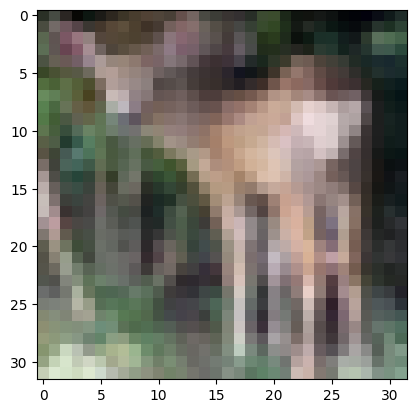

In [ ]:
idx = random.randint(5, len(X_images))
plt.imshow(X_images[idx,:])
plt.show()

In [ ]:
X_images, Y_images = X_images / 255.0, Y_images / 255.0

In [ ]:
X_images[1,:]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [ ]:
history = model.fit(X_images, X_labels, epochs=10, validation_data=(Y_images, Y_labels))


Epoch 1/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.1501 - accuracy: 0.9467 - val_loss: 2.1247 - val_accuracy: 0.6876
Epoch 2/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.1445 - accuracy: 0.9490 - val_loss: 2.0872 - val_accuracy: 0.6833
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.1432 - accuracy: 0.9491 - val_loss: 2.1352 - val_accuracy: 0.6832
Epoch 4/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.1436 - accuracy: 0.9500 - val_loss: 2.1715 - val_accuracy: 0.6844
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.1315 - accuracy: 0.9542 - val_loss: 2.2726 - val_accuracy: 0.6808
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.1380 - accuracy: 0.9507 - val_loss: 2.3100 - val_accuracy: 0.6782
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.1220 - accuracy: 0.9570 - val_loss: 2.4676 -

In [ ]:
test_loss, test_acc = model.evaluate(Y_images,  Y_labels, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 3s - loss: 1.3124 - accuracy: 0.7043 - 3s/epoch - 10ms/step

Test accuracy: 0.7042999863624573


313/313 [==============================] - 3s 11ms/step


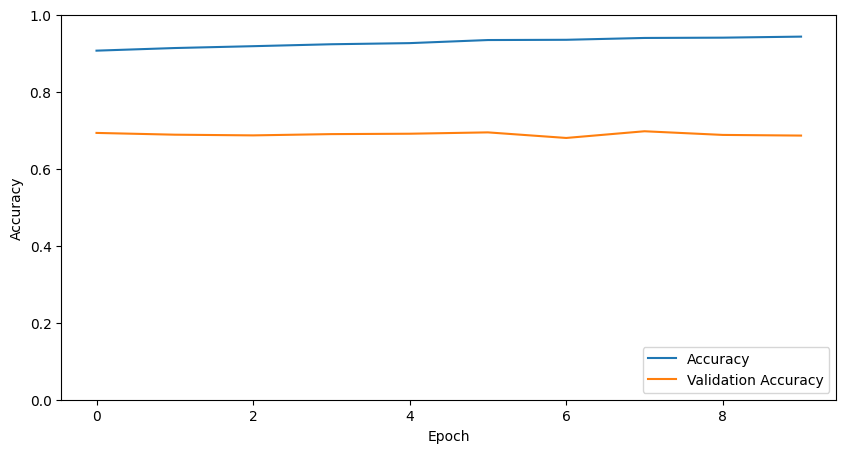

In [ ]:
predictions = model.predict(Y_images)
def get_class_label(prediction):
    return cifar_10_labels[np.argmax(prediction)]

num_examples = 5

random_indices = np.random.choice(Y_images.shape[0], num_examples, replace=False)

plt.figure(figsize=(10, 5), dpi=100)  # Adjust figure size and dpi for clarity
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Save the plot with higher resolution
plt.savefig('training_history.png', dpi=300)

# Show the plot
plt.show()

In [1]:
predictions = model.predict(Y_images)
def get_class_label(prediction):
    return cifar_10_labels[np.argmax(prediction)]

num_examples = 5

random_indices = np.random.choice(Y_images.shape[0], num_examples, replace=False)

plt.figure(figsize=(15, 7))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_examples, i+1)
    plt.imshow(Y_images[idx])
    plt.title(f"Actual: {cifar_10_labels[Y_labels[idx][0]]}\nPredicted: {get_class_label(predictions[idx])}")
    plt.axis('off')
    plt.subplots_adjust(wspace=0.5)  # Adjust spacing between subplots
plt.show()

NameError: ignored

In [ ]:
predictions = model.predict(Y_images)
cifar_10_labels = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]
def get_class_label(prediction):
    return cifar_10_labels[np.argmax(prediction)]
for i in range(np.random.randint(20)):
    prediction_label = get_class_label(predictions[i])
    actual_label = cifar_10_labels[Y_labels[i][0]]
    print(f"Predicted: {prediction_label}, Actual: {actual_label}")


313/313 [==============================] - 5s 16ms/step
Predicted: cat, Actual: cat
Predicted: ship, Actual: ship
Predicted: truck, Actual: ship
Predicted: airplane, Actual: airplane
Predicted: frog, Actual: frog
Predicted: frog, Actual: frog


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

In [ ]:
model.save('Aryan_Rajesh_Acmegrade_AL-ML_Final.h5 ')

# New Section